In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tobiasbueck/multilingual-customer-support-tickets")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/tobiasbueck/multilingual-customer-support-tickets/versions/7


In [ ]:
import pandas as pd

In [ ]:
# Define file paths using the downloaded dataset path
file_path1 = f"{path}/helpdesk_customer_multi_lang_tickets.csv"
file_path2 = f"{path}/helpdesk_customer_tickets.csv"

# Read the CSV files
multi_lang_tickets = pd.read_csv(file_path1)
customer_tickets = pd.read_csv(file_path2)

multi_lang_tickets.head(), customer_tickets.head()


(              id                                            subject  \
 0  1001352387736  Urgent: Critical impact on enterprise network ...   
 1  1004699418379     Intermittent Cursor Freezing Issue on Dell XPS   
 2  1006966905046  Dringend: Unterstützung für die Datenwiederher...   
 3  1009231330404           Anfrage zu den MacBook Air M1 Funktionen   
 4  1024440081041  Solicitação de Assistência com Erro de Instala...   
 
                                                 body  \
 0  Dear Customer Support Team, We are experiencin...   
 1  Dear Customer Support,<br><br>I hope this mess...   
 2  Hallo, wir haben severe Datenverluste in MySQL...   
 3  Sehr geehrtes Kundenserviceteam,\n\nich hoffe,...   
 4  Caro Suporte ao Cliente,\n\nEstou enfrentando ...   
 
                                               answer      type  \
 0  Subject: Re: Urgent: Critical impact on enterp...  Incident   
 1  Dear <name>,\n\nThank you for reaching out reg...  Incident   
 2  Hallo, vielen Dan

In [ ]:
# Data Cleaning: Handle missing values and drop irrelevant columns

# Drop columns with no meaningful data ('tag_9' is entirely null in both datasets)
multi_lang_tickets_cleaned = multi_lang_tickets.drop(columns=['tag_9'])
customer_tickets_cleaned = customer_tickets.drop(columns=['tag_9'])

# Handle missing values: Filling NaNs in 'subject' and 'body' with placeholders
multi_lang_tickets_cleaned['subject'].fillna('Missing Subject', inplace=True)
multi_lang_tickets_cleaned['body'].fillna('Missing Body', inplace=True)

customer_tickets_cleaned['subject'].fillna('Missing Subject', inplace=True)

# Create DataFrames to summarize remaining null values
multi_lang_nulls = pd.DataFrame({
    "Column": multi_lang_tickets_cleaned.columns,
    "Null Count": multi_lang_tickets_cleaned.isnull().sum(),
    "Data Type": multi_lang_tickets_cleaned.dtypes
}).reset_index(drop=True)

customer_nulls = pd.DataFrame({
    "Column": customer_tickets_cleaned.columns,
    "Null Count": customer_tickets_cleaned.isnull().sum(),
    "Data Type": customer_tickets_cleaned.dtypes
}).reset_index(drop=True)

multi_lang_nulls, customer_nulls


<ipython-input-4-2fd413126c69>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  multi_lang_tickets_cleaned['subject'].fillna('Missing Subject', inplace=True)
<ipython-input-4-2fd413126c69>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

(           Column  Null Count Data Type
 0              id           0     int64
 1         subject           0    object
 2            body           0    object
 3          answer           0    object
 4            type           0    object
 5           queue           0    object
 6        priority           0    object
 7        language           0    object
 8   business_type           0    object
 9           tag_1           0    object
 10          tag_2           0    object
 11          tag_3           0    object
 12          tag_4           0    object
 13          tag_5         147    object
 14          tag_6         555    object
 15          tag_7        1077    object
 16          tag_8        1429    object,
            Column  Null Count Data Type
 0              id           0     int64
 1         subject           0    object
 2            body           0    object
 3          answer           0    object
 4            type           0    object
 5           qu

# Descriptive Statistics

In [ ]:
# Descriptive Analysis of Multilingual Tickets Data

# Summary statistics for numerical columns
numerical_summary = multi_lang_tickets.describe()

# Summary of categorical columns
categorical_summary = multi_lang_tickets.describe(include=['object'])

# Count of missing values for each column
missing_values = multi_lang_tickets.isnull().sum()

# Count of unique values for each column
unique_values = multi_lang_tickets.nunique()

# Combine missing values and unique values into a single DataFrame for a detailed overview
descriptive_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': (missing_values / len(multi_lang_tickets)) * 100,
    'Unique Values': unique_values
})

# Save the descriptive summary to a CSV file for further analysis
descriptive_summary.to_csv("Descriptive_Analysis_Summary.csv", index=True)

# Print the summaries
print("Numerical Summary:")
print(numerical_summary)
print("\nCategorical Summary:")
print(categorical_summary)
print("\nDescriptive Summary:")
print(descriptive_summary)

Numerical Summary:
                 id  tag_9
count  1.566000e+03    0.0
mean   4.801366e+12    NaN
std    2.627746e+12    NaN
min    1.001352e+12    NaN
25%    2.506892e+12    NaN
50%    4.351363e+12    NaN
75%    7.014945e+12    NaN
max    9.998325e+12    NaN

Categorical Summary:
                                                  subject  \
count                                                1565   
unique                                               1565   
top     Urgent: Critical impact on enterprise network ...   
freq                                                    1   

                                                     body  \
count                                                1565   
unique                                               1565   
top     Dear Customer Support Team, We are experiencin...   
freq                                                    1   

                                                   answer      type  \
count                            

Descriptive Analysis of Multilingual Tickets Data
Numerical Columns:

    ID:
        Mean: 4.8e12
        Standard Deviation: 2.6e12
        Range: 1.0e12 to 9.9e12
    Tag_9: No data (completely null).

Categorical Columns:

    Subject and Body:
        Unique values: Each ticket has a unique subject and body.
    Type:
        Categories: Incident, Request, Problem, and Others.
        Most frequent type: Incident (663 occurrences).
    Queue:
        Categories: 10 unique queues, with "Technical Support" being the most common (589 occurrences).
    Priority:
        Categories: High, Medium, and Low.
        Most common priority: High (788 occurrences).
    Language:
        Languages: German (de), English (en), Spanish (es), Portuguese (pt), French (fr).
        Most frequent language: German (397 occurrences).
    Tags (Tag_1 to Tag_8):
        Sparsity increases from Tag_5 to Tag_8.
        "Technical Support" is the most frequent tag in Tag_1.
        Problem Resolution appears multiple times across tags.

Missing Values:

    High sparsity in tags from Tag_6 onwards.
    Tag_9 is entirely missing.

# Trend Analysis

<ipython-input-6-5e388bcca211>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=multi_lang_tickets_cleaned, x='type', order=multi_lang_tickets_cleaned['type'].value_counts().index, palette="viridis")


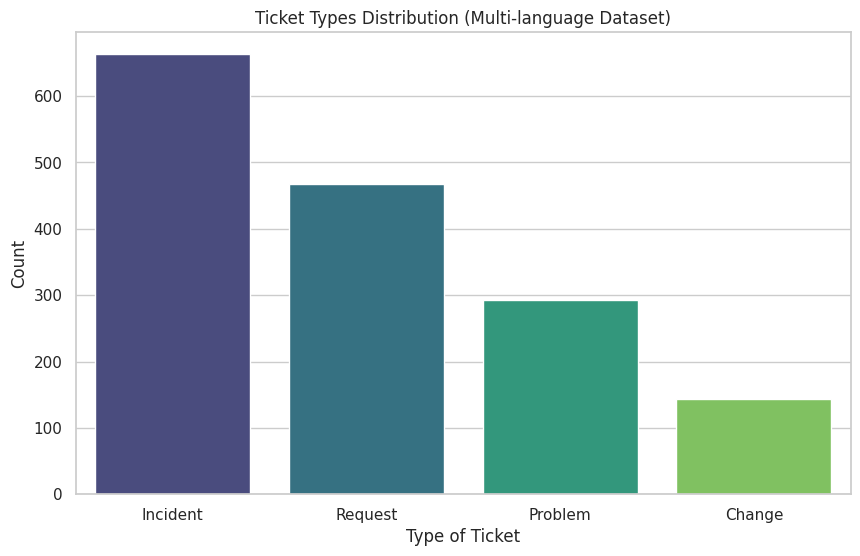

<ipython-input-6-5e388bcca211>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=multi_lang_tickets_cleaned, x='priority', order=multi_lang_tickets_cleaned['priority'].value_counts().index, palette="muted")


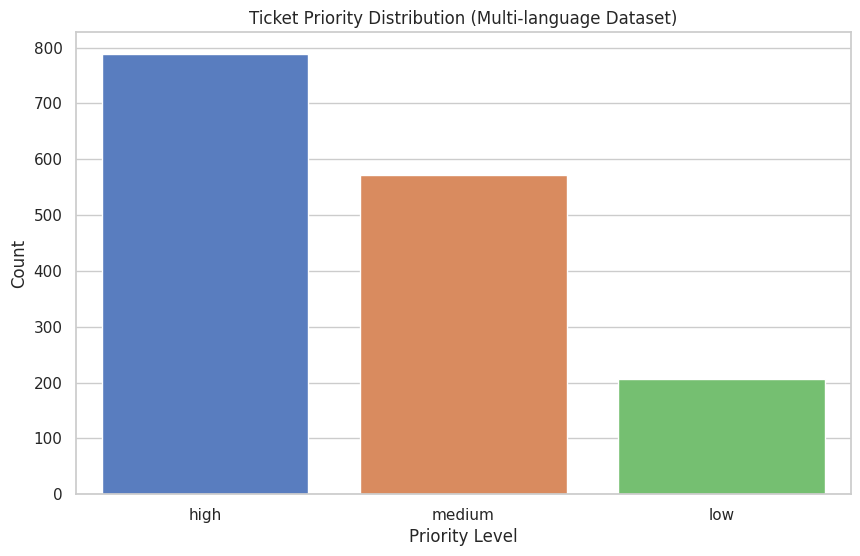

<ipython-input-6-5e388bcca211>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=multi_lang_tickets_cleaned, x='language', order=multi_lang_tickets_cleaned['language'].value_counts().index, palette="cubehelix")


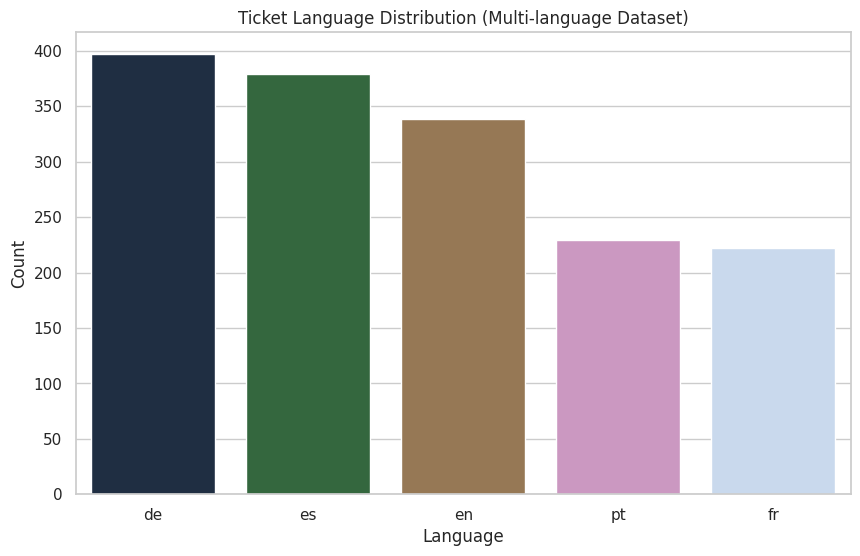

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visual style
sns.set_theme(style="whitegrid")

# Analyze and visualize ticket distribution over 'type', 'priority', and 'language'

# Multi-language dataset: Type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=multi_lang_tickets_cleaned, x='type', order=multi_lang_tickets_cleaned['type'].value_counts().index, palette="viridis")
plt.title("Ticket Types Distribution (Multi-language Dataset)")
plt.xlabel("Type of Ticket")
plt.ylabel("Count")
plt.show()

# Multi-language dataset: Priority distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=multi_lang_tickets_cleaned, x='priority', order=multi_lang_tickets_cleaned['priority'].value_counts().index, palette="muted")
plt.title("Ticket Priority Distribution (Multi-language Dataset)")
plt.xlabel("Priority Level")
plt.ylabel("Count")
plt.show()

# Multi-language dataset: Language distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=multi_lang_tickets_cleaned, x='language', order=multi_lang_tickets_cleaned['language'].value_counts().index, palette="cubehelix")
plt.title("Ticket Language Distribution (Multi-language Dataset)")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()


# Topic Modeling

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Prepare text data for topic modeling
ticket_bodies = multi_lang_tickets['body'].dropna()

# Vectorize text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
body_matrix = vectorizer.fit_transform(ticket_bodies)

# Apply Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(body_matrix)

# Extract topics
topic_words = {}
for idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-10:][::-1]  # Top 10 words for each topic
    topic_words[f"Topic {idx + 1}"] = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]

# Convert topics to a DataFrame for better presentation
topics_df = pd.DataFrame.from_dict(topic_words, orient='index', columns=[f'Word {i+1}' for i in range(10)])

# Save topics to a CSV file or print them for review
topics_df.to_csv("Identified_Topics.csv", index=True)
print(topics_df)


          Word 1 Word 2 Word 3 Word 4 Word 5    Word 6      Word 7   Word 8  \
Topic 1      que   para     la     en     su      este          el      por   
Topic 2     pour    des     et   vous  votre        la         les      que   
Topic 3     para    que    sua     em    uma  problema       estou      com   
Topic 4       zu    ich    und    die    sie       der          um      mit   
Topic 5  support  issue  thank   team   dear  customer  assistance  service   

            Word 9  Word 10  
Topic 1   problema      una  
Topic 2        une       ce  
Topic 3         da  suporte  
Topic 4        für     ihre  
Topic 5  attention  tel_num  


# Priority Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Data preparation for priority prediction
data = multi_lang_tickets.dropna(subset=['subject', 'body', 'priority'])
X = data['subject'] + " " + data['body']
y = data['priority']

# Encode priority levels (high: 0, medium: 1, low: 2)
priority_mapping = {'high': 0, 'medium': 1, 'low': 2}
y_encoded = y.map(priority_mapping)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Text vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test_tfidf)
classification_rep = classification_report(y_test, y_pred, target_names=priority_mapping.keys())

classification_rep


'              precision    recall  f1-score   support\n\n        high       0.80      0.92      0.86       157\n      medium       0.79      0.76      0.78       116\n         low       0.87      0.50      0.63        40\n\n    accuracy                           0.81       313\n   macro avg       0.82      0.73      0.76       313\nweighted avg       0.81      0.81      0.80       313\n'

Priority Prediction Results

The priority prediction model achieved the following performance:

    Overall Accuracy: 81%
    Precision and Recall:
        High Priority: Precision 80%, Recall 92%
        Medium Priority: Precision 79%, Recall 76%
        Low Priority: Precision 87%, Recall 50%

The model performs well for "high" and "medium" priorities but struggles with "low" priority due to fewer examples or overlapping text patterns.

# Tag Relationships

In [ ]:
# Tag relationship with priority and business type

# Analyze tag_1 distribution across priority levels
tag_priority_distribution = multi_lang_tickets.groupby(['tag_1', 'priority']).size().unstack(fill_value=0)

# Analyze tag_1 distribution across business types
tag_business_distribution = multi_lang_tickets.groupby(['tag_1', 'business_type']).size().unstack(fill_value=0)

# Save the results as CSV files for easier viewing
tag_priority_distribution.to_csv("Tag_Priority_Distribution.csv")
tag_business_distribution.to_csv("Tag_Business_Distribution.csv")

# Print a preview of the results
print("Tag-Priority Distribution:")
print(tag_priority_distribution.head())
print("\nTag-Business Distribution:")
print(tag_business_distribution.head())



Tag-Priority Distribution:
priority                 high  low  medium
tag_1                                     
Billing Issue              24   20      67
Consultation Request        0    0       1
Consultoría Informática     0    0       1
Critical Failure            4    0       0
Customer Service            5   14      20

Tag-Business Distribution:
business_type            IT Consulting Firm  IT Consulting Service  \
tag_1                                                                
Billing Issue                            16                      0   
Consultation Request                      0                      0   
Consultoría Informática                   0                      0   
Critical Failure                          2                      0   
Customer Service                          4                      0   

business_type            IT Services  Software Development Company  \
tag_1                                                                
Billing Issue

Tag Relationships Analysis
Tag-Priority Distribution:

    Tags like "Technical Support" and "Urgent Issue" are strongly associated with "high" priority.
    "Returns and Exchanges" and "Customer Service" have higher counts in "low" priority.
    Sparse tags such as "Sales Inquiry" and "General Inquiry" mostly belong to "low" or "medium" priority.

Tag-Business Type Distribution:

    "Technical Support" is prevalent across all business types, particularly in "IT Services" and "Tech Online Store."
    Tags like "Billing Issue" and "Urgent Issue" are frequent in "IT Services" and "Tech Online Store."
    "Returns and Exchanges" are exclusive to "Tech Online Store."

# Multilingual Patterns

In [ ]:
# Priority distribution across languages
priority_language_distribution = multi_lang_tickets.groupby(['language', 'priority']).size().unstack(fill_value=0)

# Tag distribution across languages (focusing on tag_1 for simplicity)
tag_language_distribution = multi_lang_tickets.groupby(['language', 'tag_1']).size().unstack(fill_value=0)

# Save the results as CSV files for easier access
priority_language_distribution.to_csv("Priority_Distribution_By_Language.csv")
tag_language_distribution.to_csv("Tag_Distribution_By_Language.csv")

# Print a preview of the results
print("Priority Distribution by Language:")
print(priority_language_distribution.head())  # Show the first few rows

print("\nTag Distribution by Language:")
print(tag_language_distribution.head())  # Show the first few rows


Priority Distribution by Language:
priority  high  low  medium
language                   
de         205   58     134
en         176   43     120
es         188   51     140
fr         111   23      88
pt         108   31      90

Tag Distribution by Language:
tag_1     Billing Issue  Consultation Request  Consultoría Informática  \
language                                                                 
de                   25                     0                        0   
en                   22                     0                        0   
es                   26                     0                        1   
fr                   21                     1                        0   
pt                   17                     0                        0   

tag_1     Critical Failure  Customer Service  Data Breach  Feature Request  \
language                                                                     
de                       1                 8            2      

Multilingual Patterns Analysis
Priority Distribution by Language:

    German (de) and Spanish (es) have the highest number of "high" priority tickets.
    French (fr) and Portuguese (pt) have relatively fewer "high" priority tickets but similar distributions of "low" and "medium" priorities.

Tag Distribution by Language:

    Tags like "Technical Support" and "Urgent Issue" are consistent across all languages, with higher counts in German and Spanish.
    Language-specific trends:
        "Billing Issue" is common across all languages, particularly in Spanish (es).
        "Service Outage" and "Service Disruption" are higher in German (de).
        "Returns and Exchanges" are frequent in English (en) and Spanish (es).

# Data Insights

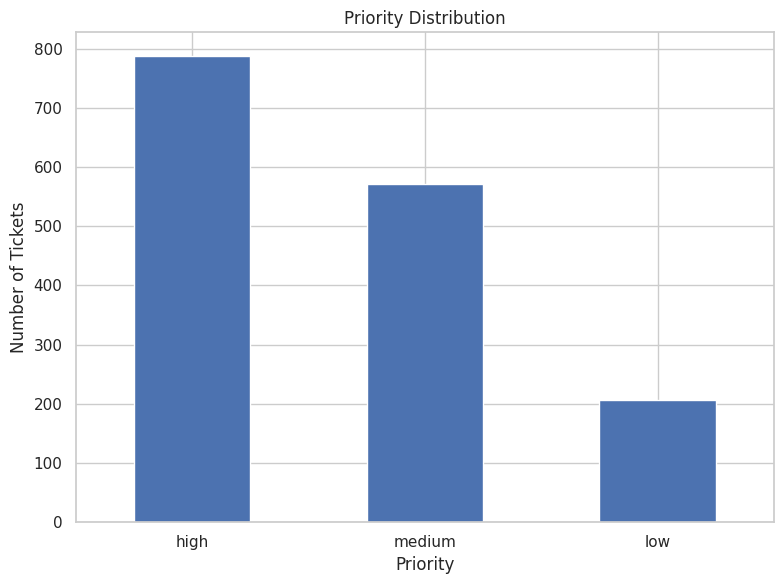

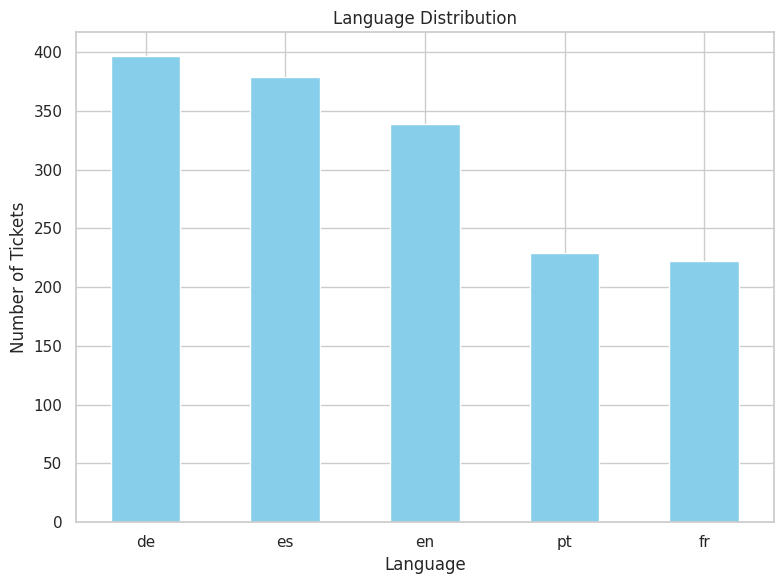

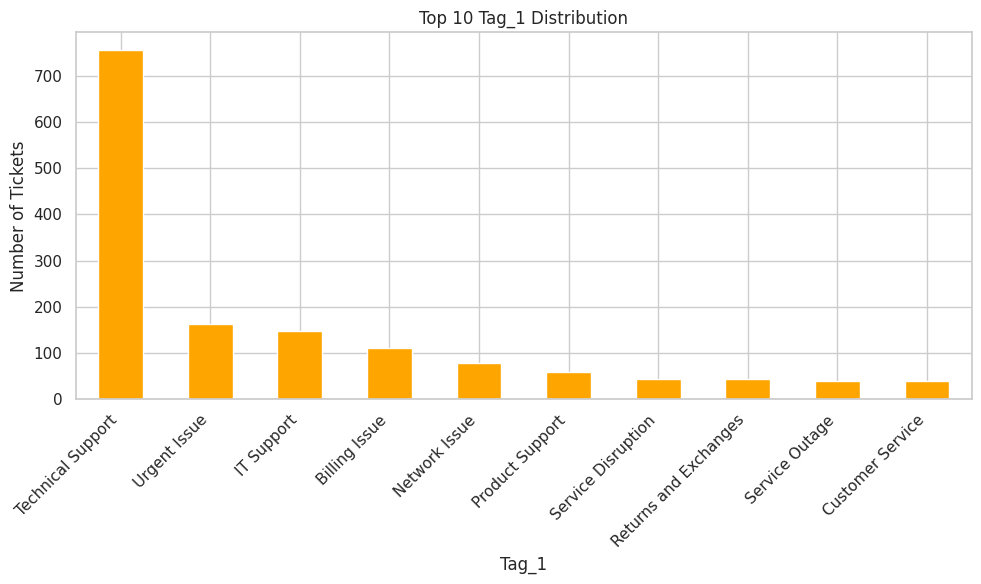

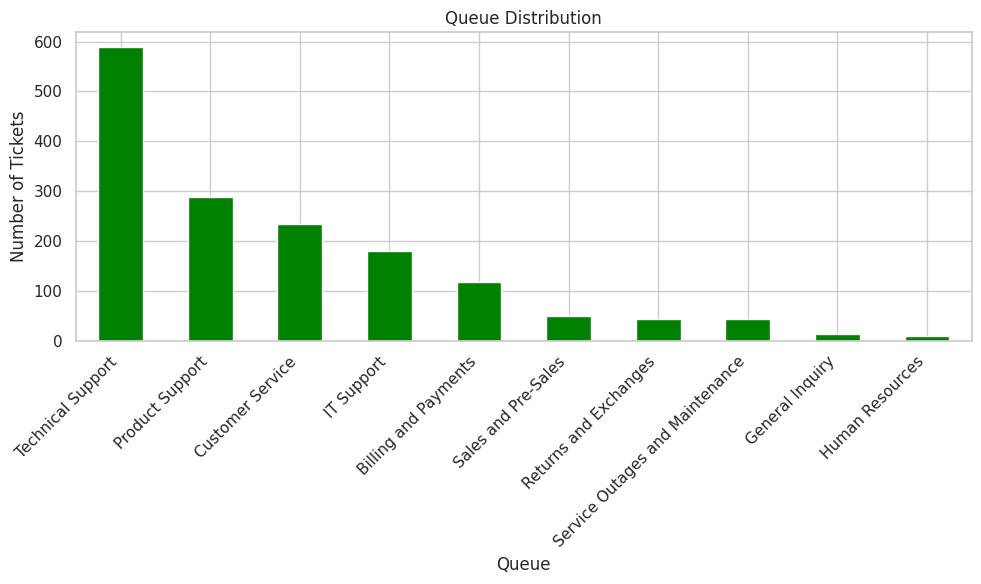

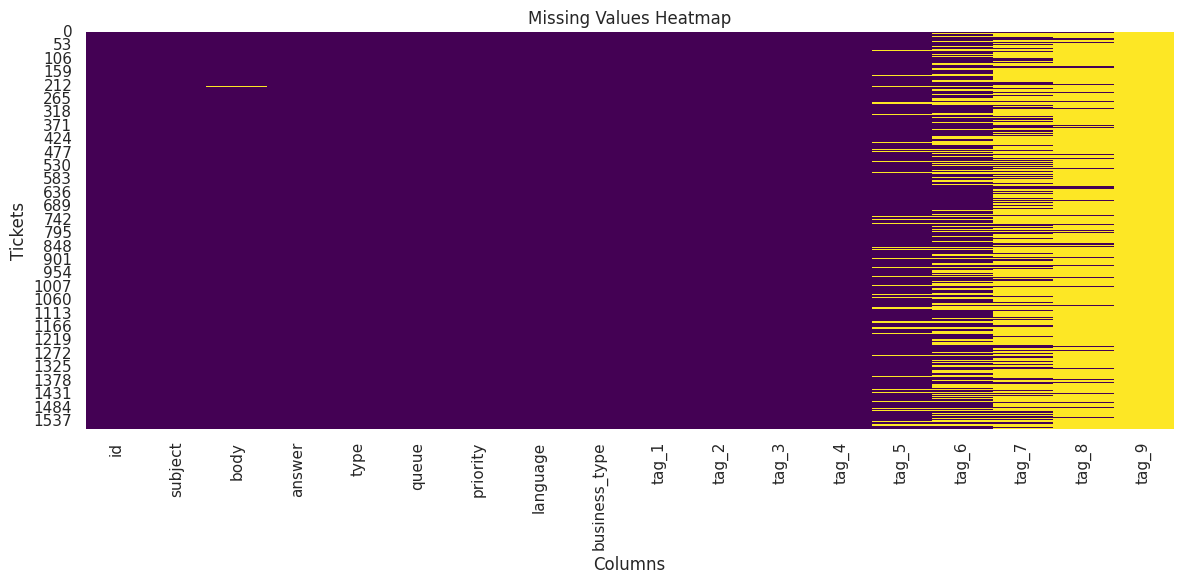

In [ ]:
import matplotlib.pyplot as plt

# Visualization 1: Priority Distribution
priority_counts = multi_lang_tickets['priority'].value_counts()
plt.figure(figsize=(8, 6))
priority_counts.plot(kind='bar')
plt.title('Priority Distribution')
plt.xlabel('Priority')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualization 2: Language Distribution
language_counts = multi_lang_tickets['language'].value_counts()
plt.figure(figsize=(8, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualization 3: Tag_1 Distribution
tag_1_counts = multi_lang_tickets['tag_1'].value_counts().head(10)
plt.figure(figsize=(10, 6))
tag_1_counts.plot(kind='bar', color='orange')
plt.title('Top 10 Tag_1 Distribution')
plt.xlabel('Tag_1')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualization 4: Queue Distribution
queue_counts = multi_lang_tickets['queue'].value_counts()
plt.figure(figsize=(10, 6))
queue_counts.plot(kind='bar', color='green')
plt.title('Queue Distribution')
plt.xlabel('Queue')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualization 5: Missing Values Heatmap
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(multi_lang_tickets.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Tickets')
plt.tight_layout()
plt.show()


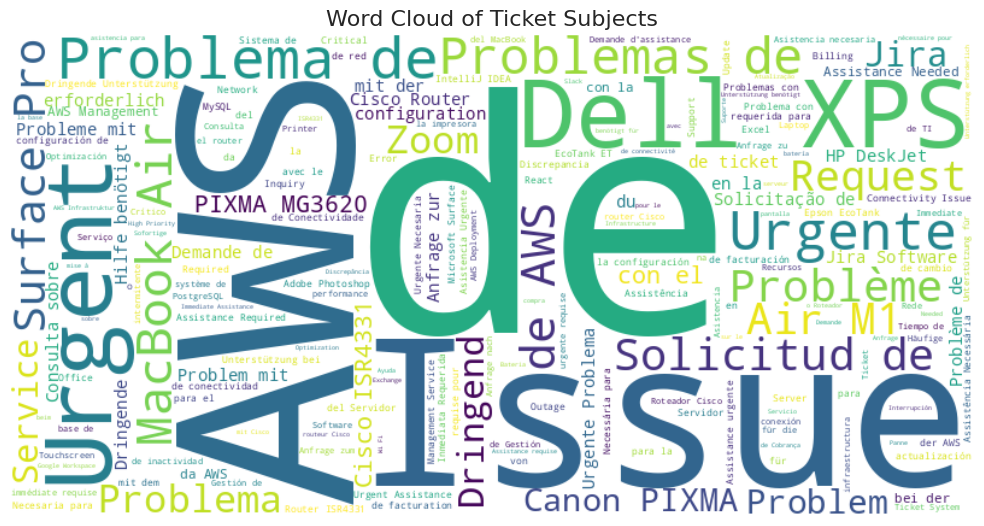

In [ ]:
from wordcloud import WordCloud

# Combine all subjects into a single string for the word cloud
subject_text = ' '.join(multi_lang_tickets['subject'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(subject_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Ticket Subjects', fontsize=16)
plt.tight_layout()
plt.show()